In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate random data
np.random.seed(42)
torch.manual_seed(42)
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, (100, 1))

In [3]:
# Convert data to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [4]:
# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [5]:
# Instantiate the model
model = LogisticRegression(2)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Train the model
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    losses.append(loss.item())

Epoch [10/100], Loss: 0.6905
Epoch [20/100], Loss: 0.6902
Epoch [30/100], Loss: 0.6899
Epoch [40/100], Loss: 0.6896
Epoch [50/100], Loss: 0.6894
Epoch [60/100], Loss: 0.6892
Epoch [70/100], Loss: 0.6889
Epoch [80/100], Loss: 0.6887
Epoch [90/100], Loss: 0.6885
Epoch [100/100], Loss: 0.6884


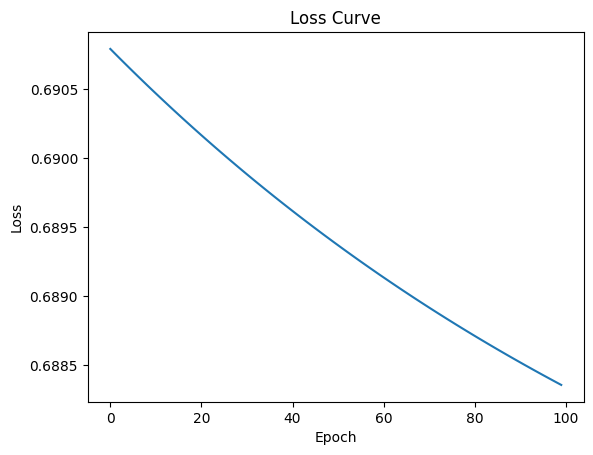

In [7]:
# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [8]:
# Get the predicted probabilities
predicted = model(X).detach().numpy()

# Convert probabilities to predicted classes
predicted_classes = np.round(predicted)

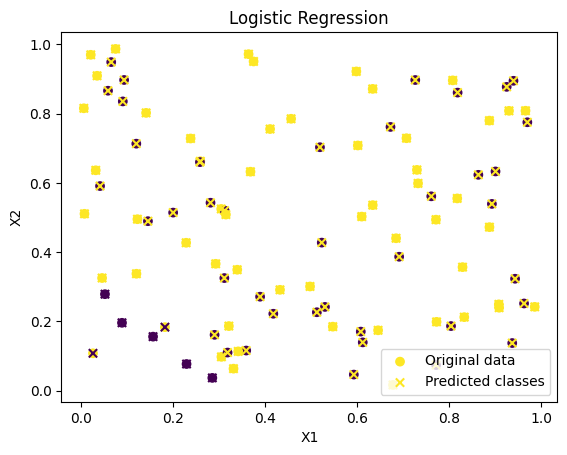

In [9]:
# Plot the original data and the predicted classes
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=y.numpy().flatten(), label='Original data')
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=predicted_classes.flatten(), label='Predicted classes', marker='x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression')
plt.legend()
plt.show()